In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [8]:
dt = np.dtype([('m2', float), ('m1', float), ('r', float), ('rexp', float)])
best_hino = np.genfromtxt('./results_higgsinos/bestSR/rValues.dat', dtype=dt, usecols=range(0,4))
combSR_sigError22_hino_ = np.genfromtxt('./results_higgsinos/combined_fake_json/rValues.dat', dtype=dt, usecols=range(0,4))


In [3]:
obsLim = np.genfromtxt('../orig/HEPData-ins1767649-v5-Figure_14a_Observed.csv', 
                       dtype=np.dtype([('m2', float), ('m1', float)]), 
                       usecols=range(0,2), delimiter=',')

expLim = np.genfromtxt('../orig/HEPData-ins1767649-v5-Figure_14a_Expected.csv', 
                       dtype=np.dtype([('m2', float), ('m1', float)]), 
                       usecols=range(0,2), delimiter=',')


In [4]:
mnt2, dm = [], []

for file in ["../orig/Figure28a.csv","../../ATLAS-SUSY-2018-16-hino-eff/orig/Figure29a.csv","../orig/Figure30a.csv","../../ATLAS-SUSY-2018-16-hino-eff/orig/Figure28a.csv"]:
    with open(file,'r') as f:
        lines = f.readlines()

    for line in lines:
        if line.startswith('#') or line.startswith('$') or line.startswith('\n'):
            continue
        else:
            mnt2.append(float(line.split(',')[0]))
            dm.append(float(line.split(',')[1]))

In [5]:
SR_E_high_obs = [(131.3966192463826, 55.25194240700641),
(139.9654669597321, 48.877779870224444),
(142.76285800882536, 44.43299948882646),
(139.04822931657037, 38.77523445167087),
(130.49513267894773, 33.38013688217867),
(125.4784150599376, 28.73570086756679),
(124.36927681083672, 25.190819815495534),
(127.35594328658127, 21.685826675364055),
(133.87820122715198, 18.924516086900528),
(141.32898508182205, 17.1256568208005),
(153.4339492958553, 15.218886015288932),
(166.84126495457247, 13.647776599948973),
(183.9731849868383, 11.802317466721668),
(193.66035907679606, 10.160169967692386),
(192.55279593526785, 8.667447920074494),
(184.55728737837666, 7.563800082482612),
(171.16572279538633, 6.423305861036308),
(147.73074729308217, 4.803628108406924),
(136.57189769437662, 4.1352622635862515),
(123.36750839460738, 3.4485362269198303),
(109.04846796923289, 2.7732745987315295),
(96.77391717320693, 2.3444432689720887)
]
SR_E_high_obs_x = [x[0] for x in SR_E_high_obs]
SR_E_high_obs_y = [y[1] for y in SR_E_high_obs]

SR_E_high_exp = [(123.22706130270942, 39.12891861539535),
(135.33675083946073, 32.043707110107086),
(147.44644037621202, 26.24143987854373),
(153.5938227144831, 23.963680930310776),
(159.5545548053907, 22.083240840420668),
(166.07418756667357, 20.166413880350557),
(172.22156990494466, 18.41596764407922),
(178.55533997265042, 16.741281684401905),
(184.33099692376715, 15.14994854034213),
(187.68571353566307, 14.02465364882393),
(191.0406926654877, 12.924133196863036),
(193.65327109271897, 11.485160074594814),
(194.03234698187907, 10.206402234471236),
(192.54938320219367, 9.194400707986677),
(189.76249287025172, 8.434532207844482),
(186.41722690379197, 7.737462812923661),
(181.39788410549403, 6.97026551872434),
(175.44844028552404, 6.222381806577973),
(169.12727107839976, 5.5045342292226955),
(164.10740324424427, 5.003970459433156),
(159.64486097289142, 4.632289830927141),
(151.4634897224231, 4.02413756295202),
(143.46693109381675, 3.5760900455522915),
(137.7017748598512, 3.29547276032514),
(131.1923802977908, 3.0231193984064517),
(118.54505404289542, 2.5789657087602946),
(109.80294449655027, 2.333823569280759),
(100.87418470284162, 2.1312475085489426),
(95.85142917146955, 2.0366519728305392)
]
SR_E_high_exp_x = [x[0] for x in SR_E_high_exp]
SR_E_high_exp_y = [y[1] for y in SR_E_high_exp]


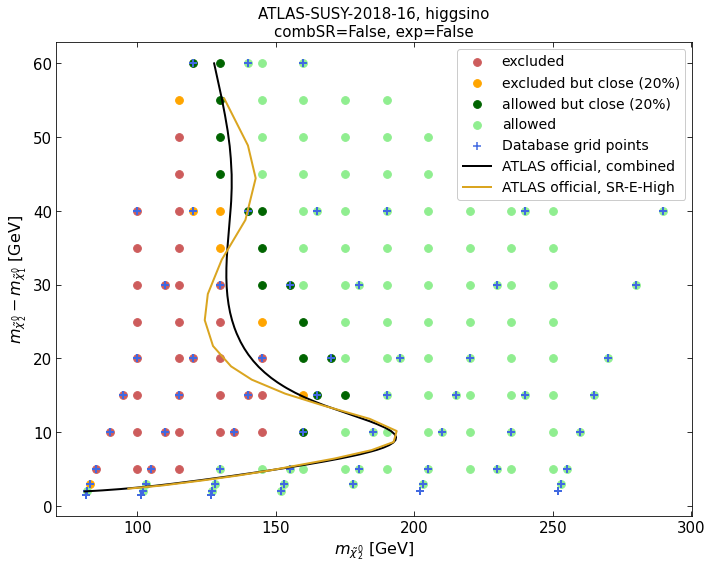

In [14]:
fig = plt.figure(figsize=(10,8))

plt.tick_params(which="major", length=5, direction="in", bottom=True, top=True, left=True, right=True)
plt.tick_params(which="minor", axis="x", direction="in", bottom=True, top=True, length=4)
plt.tick_params(which="minor", axis="y", direction="in", bottom=True, top=True, length=4)
plt.tick_params(labelbottom=True, labelleft=True, labeltop=False, labelright=False)

d = {"excluded": {"m2": [], "dm": []},
     "excluded_close": {"m2": [], "dm": []},
     "allowed_close": {"m2": [], "dm": []},
     "allowed": {"m2": [], "dm": []}
    }
for result in best_hino:
    if result['r'] >= 1.2:
        d["excluded"]["m2"].append(result["m2"])
        d["excluded"]["dm"].append(result["m2"]-result["m1"])
    elif 1.2 > result['r'] >= 1.:
        d["excluded_close"]["m2"].append(result["m2"])
        d["excluded_close"]["dm"].append(result["m2"]-result["m1"])
    elif 1 > result['r'] >= 0.8:
        d["allowed_close"]["m2"].append(result["m2"])
        d["allowed_close"]["dm"].append(result["m2"]-result["m1"])
    elif result['r'] > 0:
        d["allowed"]["m2"].append(result["m2"])
        d["allowed"]["dm"].append(result["m2"]-result["m1"])
        
plt.scatter(d["excluded"]["m2"],d["excluded"]["dm"],s=60,color='indianred',label='excluded')
plt.scatter(d["excluded_close"]["m2"],d["excluded_close"]["dm"],s=60,color='orange',label='excluded but close (20%)')
plt.scatter(d["allowed_close"]["m2"],d["allowed_close"]["dm"],s=60,color='darkgreen',label='allowed but close (20%)')
plt.scatter(d["allowed"]["m2"],d["allowed"]["dm"],s=60,color='lightgreen',label='allowed')

#plt.scatter(combSR_full_sigInCRs_sigError22_hino['m2'],combSR_full_sigInCRs_sigError22_hino['m2']-combSR_full_sigInCRs_sigError22_hino['m1'], c=combSR_full_sigInCRs_sigError22_hino['r'], cmap='coolwarm', s=50, alpha=1, vmin=0.8, vmax=1.2, marker='o', label=None,zorder=1)
#cbar = plt.colorbar()
#cbar.set_label(r'$r$-value', rotation=90,fontsize=14)

plt.scatter(mnt2,dm,marker='+',s=50,c='royalblue',zorder=2,label='Database grid points')
plt.plot(obsLim['m2'],obsLim['m1'], c='k', linewidth=2, label='ATLAS official, combined')
plt.plot(SR_E_high_obs_x,SR_E_high_obs_y, c='goldenrod', linewidth=2, label='ATLAS official, SR-E-High')
plt.legend(loc='upper right', frameon=True, fontsize=14, framealpha=1)

plt.xlabel(r'$m_{\tilde \chi_2^0}$ [GeV]', fontsize=16)
plt.ylabel(r'$m_{\tilde \chi_2^0} - m_{\tilde \chi_1^0}$ [GeV]', fontsize=16)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('ATLAS-SUSY-2018-16, higgsino\n'+ r'combSR=False, exp=False',loc='center',fontsize=15)

plt.tight_layout()
plt.show()
#fig.savefig('TChi_nonDegenHinoLSP_BRN2toZN1100_EqMassAx_EqMassBx-y__EqmassAx-yd2_EqmassBx-y_obs.png', dpi=150)


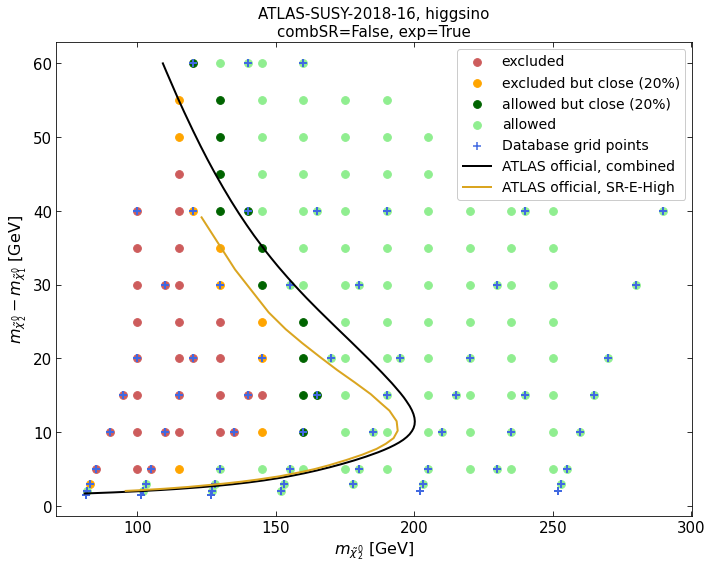

In [13]:
fig = plt.figure(figsize=(10,8))

plt.tick_params(which="major", length=5, direction="in", bottom=True, top=True, left=True, right=True)
plt.tick_params(which="minor", axis="x", direction="in", bottom=True, top=True, length=4)
plt.tick_params(which="minor", axis="y", direction="in", bottom=True, top=True, length=4)
plt.tick_params(labelbottom=True, labelleft=True, labeltop=False, labelright=False)

d = {"excluded": {"m2": [], "dm": []},
     "excluded_close": {"m2": [], "dm": []},
     "allowed_close": {"m2": [], "dm": []},
     "allowed": {"m2": [], "dm": []}
    }
for result in best_hino:
    if result['rexp'] >= 1.2:
        d["excluded"]["m2"].append(result["m2"])
        d["excluded"]["dm"].append(result["m2"]-result["m1"])
    elif 1.2 > result['rexp'] >= 1.:
        d["excluded_close"]["m2"].append(result["m2"])
        d["excluded_close"]["dm"].append(result["m2"]-result["m1"])
    elif 1 > result['rexp'] >= 0.8:
        d["allowed_close"]["m2"].append(result["m2"])
        d["allowed_close"]["dm"].append(result["m2"]-result["m1"])
    elif result['rexp'] > 0:
        d["allowed"]["m2"].append(result["m2"])
        d["allowed"]["dm"].append(result["m2"]-result["m1"])
        
plt.scatter(d["excluded"]["m2"],d["excluded"]["dm"],s=60,color='indianred',label='excluded')
plt.scatter(d["excluded_close"]["m2"],d["excluded_close"]["dm"],s=60,color='orange',label='excluded but close (20%)')
plt.scatter(d["allowed_close"]["m2"],d["allowed_close"]["dm"],s=60,color='darkgreen',label='allowed but close (20%)')
plt.scatter(d["allowed"]["m2"],d["allowed"]["dm"],s=60,color='lightgreen',label='allowed')

#plt.scatter(combSR_full_sigInCRs_sigError22_hino['m2'],combSR_full_sigInCRs_sigError22_hino['m2']-combSR_full_sigInCRs_sigError22_hino['m1'], c=combSR_full_sigInCRs_sigError22_hino['rexp'], cmap='coolwarm', s=50, alpha=1, vmin=0.8, vmax=1.2, marker='o', label=None,zorder=2)
#cbar = plt.colorbar()
#cbar.set_label(r'$r$-value', rotation=90,fontsize=14)

plt.scatter(mnt2,dm,marker='+',s=50,c='royalblue',zorder=2,label='Database grid points')
plt.plot(expLim['m2'],expLim['m1'], c='k', linewidth=2, label='ATLAS official, combined')
plt.plot(SR_E_high_exp_x,SR_E_high_exp_y, c='goldenrod', linewidth=2, label='ATLAS official, SR-E-High')
plt.legend(loc='upper right', frameon=True, fontsize=14, framealpha=1)

plt.xlabel(r'$m_{\tilde \chi_2^0}$ [GeV]', fontsize=16)
plt.ylabel(r'$m_{\tilde \chi_2^0} - m_{\tilde \chi_1^0}$ [GeV]', fontsize=16)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('ATLAS-SUSY-2018-16, higgsino\n'+ r'combSR=False, exp=True',loc='center',fontsize=15)

plt.tight_layout()
plt.show()
#fig.savefig('TChi_nonDegenHinoLSP_BRN2toZN1100_EqMassAx_EqMassBx-y__EqmassAx-yd2_EqmassBx-y_exp.png', dpi=150)


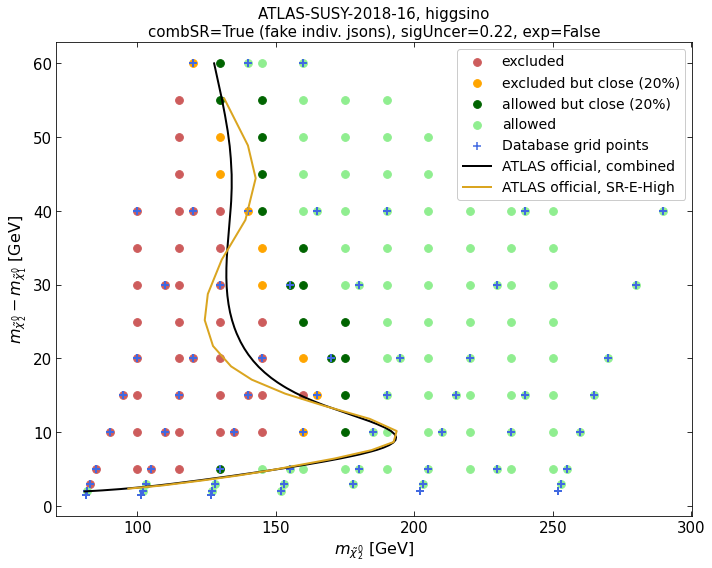

In [12]:
fig = plt.figure(figsize=(10,8))

plt.tick_params(which="major", length=5, direction="in", bottom=True, top=True, left=True, right=True)
plt.tick_params(which="minor", axis="x", direction="in", bottom=True, top=True, length=4)
plt.tick_params(which="minor", axis="y", direction="in", bottom=True, top=True, length=4)
plt.tick_params(labelbottom=True, labelleft=True, labeltop=False, labelright=False)

d = {"excluded": {"m2": [], "dm": []},
     "excluded_close": {"m2": [], "dm": []},
     "allowed_close": {"m2": [], "dm": []},
     "allowed": {"m2": [], "dm": []}
    }
for result in combSR_sigError22_hino_:
    if result['r'] >= 1.2:
        d["excluded"]["m2"].append(result["m2"])
        d["excluded"]["dm"].append(result["m2"]-result["m1"])
    elif 1.2 > result['r'] >= 1.:
        d["excluded_close"]["m2"].append(result["m2"])
        d["excluded_close"]["dm"].append(result["m2"]-result["m1"])
    elif 1 > result['r'] >= 0.8:
        d["allowed_close"]["m2"].append(result["m2"])
        d["allowed_close"]["dm"].append(result["m2"]-result["m1"])
    elif result['r'] > 0:
        d["allowed"]["m2"].append(result["m2"])
        d["allowed"]["dm"].append(result["m2"]-result["m1"])
        
plt.scatter(d["excluded"]["m2"],d["excluded"]["dm"],s=60,color='indianred',label='excluded')
plt.scatter(d["excluded_close"]["m2"],d["excluded_close"]["dm"],s=60,color='orange',label='excluded but close (20%)')
plt.scatter(d["allowed_close"]["m2"],d["allowed_close"]["dm"],s=60,color='darkgreen',label='allowed but close (20%)')
plt.scatter(d["allowed"]["m2"],d["allowed"]["dm"],s=60,color='lightgreen',label='allowed')

#plt.scatter(combSR_full_sigInCRs_sigError22_hino['m2'],combSR_full_sigInCRs_sigError22_hino['m2']-combSR_full_sigInCRs_sigError22_hino['m1'], c=combSR_full_sigInCRs_sigError22_hino['r'], cmap='coolwarm', s=50, alpha=1, vmin=0.8, vmax=1.2, marker='o', label=None,zorder=1)
#cbar = plt.colorbar()
#cbar.set_label(r'$r$-value', rotation=90,fontsize=14)

plt.scatter(mnt2,dm,marker='+',s=50,c='royalblue',zorder=2,label='Database grid points')
plt.plot(obsLim['m2'],obsLim['m1'], c='k', linewidth=2, label='ATLAS official, combined')
plt.plot(SR_E_high_obs_x,SR_E_high_obs_y, c='goldenrod', linewidth=2, label='ATLAS official, SR-E-High')
plt.legend(loc='upper right', frameon=True, fontsize=14, framealpha=1)

plt.xlabel(r'$m_{\tilde \chi_2^0}$ [GeV]', fontsize=16)
plt.ylabel(r'$m_{\tilde \chi_2^0} - m_{\tilde \chi_1^0}$ [GeV]', fontsize=16)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('ATLAS-SUSY-2018-16, higgsino\n'+ r'combSR=True (fake indiv. jsons), sigUncer=0.22, exp=False',loc='center',fontsize=15)

plt.tight_layout()
plt.show()
#fig.savefig('more/TChi_nonDegenHinoLSP_BRN2toZN1100_EqMassAx_EqMassBx-y__EqmassAx-yd2_EqmassBx-y_fake_json_obs.png', dpi=150)


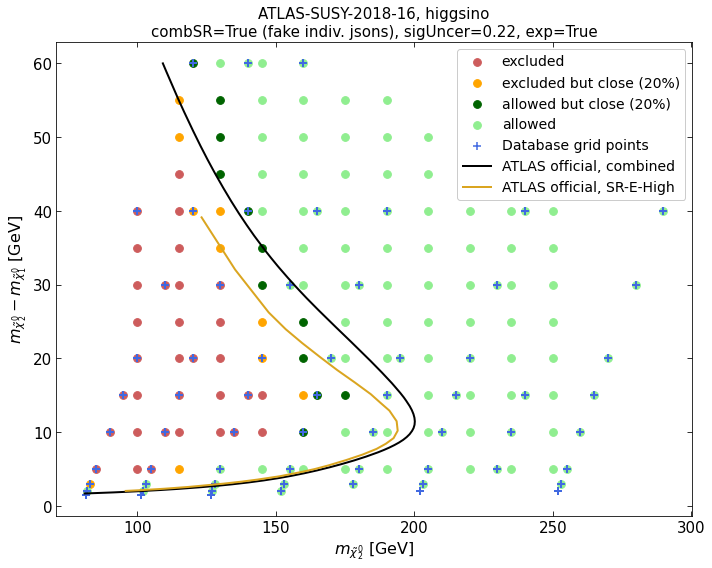

In [11]:
fig = plt.figure(figsize=(10,8))

plt.tick_params(which="major", length=5, direction="in", bottom=True, top=True, left=True, right=True)
plt.tick_params(which="minor", axis="x", direction="in", bottom=True, top=True, length=4)
plt.tick_params(which="minor", axis="y", direction="in", bottom=True, top=True, length=4)
plt.tick_params(labelbottom=True, labelleft=True, labeltop=False, labelright=False)

d = {"excluded": {"m2": [], "dm": []},
     "excluded_close": {"m2": [], "dm": []},
     "allowed_close": {"m2": [], "dm": []},
     "allowed": {"m2": [], "dm": []}
    }
for result in combSR_sigError22_hino_:
    if result['rexp'] >= 1.2:
        d["excluded"]["m2"].append(result["m2"])
        d["excluded"]["dm"].append(result["m2"]-result["m1"])
    elif 1.2 > result['rexp'] >= 1.:
        d["excluded_close"]["m2"].append(result["m2"])
        d["excluded_close"]["dm"].append(result["m2"]-result["m1"])
    elif 1 > result['rexp'] >= 0.8:
        d["allowed_close"]["m2"].append(result["m2"])
        d["allowed_close"]["dm"].append(result["m2"]-result["m1"])
    elif result['rexp'] > 0:
        d["allowed"]["m2"].append(result["m2"])
        d["allowed"]["dm"].append(result["m2"]-result["m1"])
        
plt.scatter(d["excluded"]["m2"],d["excluded"]["dm"],s=60,color='indianred',label='excluded')
plt.scatter(d["excluded_close"]["m2"],d["excluded_close"]["dm"],s=60,color='orange',label='excluded but close (20%)')
plt.scatter(d["allowed_close"]["m2"],d["allowed_close"]["dm"],s=60,color='darkgreen',label='allowed but close (20%)')
plt.scatter(d["allowed"]["m2"],d["allowed"]["dm"],s=60,color='lightgreen',label='allowed')

#plt.scatter(combSR_full_sigInCRs_sigError22_hino['m2'],combSR_full_sigInCRs_sigError22_hino['m2']-combSR_full_sigInCRs_sigError22_hino['m1'], c=combSR_full_sigInCRs_sigError22_hino['rexp'], cmap='coolwarm', s=50, alpha=1, vmin=0.8, vmax=1.2, marker='o', label=None,zorder=2)
#cbar = plt.colorbar()
#cbar.set_label(r'$r$-value', rotation=90,fontsize=14)

plt.scatter(mnt2,dm,marker='+',s=50,c='royalblue',zorder=2,label='Database grid points')
plt.plot(expLim['m2'],expLim['m1'], c='k', linewidth=2, label='ATLAS official, combined')
plt.plot(SR_E_high_exp_x,SR_E_high_exp_y, c='goldenrod', linewidth=2, label='ATLAS official, SR-E-High')
plt.legend(loc='upper right', frameon=True, fontsize=14, framealpha=1)

plt.xlabel(r'$m_{\tilde \chi_2^0}$ [GeV]', fontsize=16)
plt.ylabel(r'$m_{\tilde \chi_2^0} - m_{\tilde \chi_1^0}$ [GeV]', fontsize=16)
plt.xticks(size=15)
plt.yticks(size=15)
plt.title('ATLAS-SUSY-2018-16, higgsino\n'+ r'combSR=True (fake indiv. jsons), sigUncer=0.22, exp=True',loc='center',fontsize=15)

plt.tight_layout()
plt.show()
#fig.savefig('more/TChi_nonDegenHinoLSP_BRN2toZN1100_EqMassAx_EqMassBx-y__EqmassAx-yd2_EqmassBx-y_fake_json_exp.png', dpi=150)
